# Detection of Diabetic Retinopathy using Deep Residual Network (ResNet50)

### Diabetic retinopathy (DR) is an eye disease triggered due to diabetes, which may lead to blindness.To prevent diabetic patients from becoming blind, early diagnosis and accurate detection of DR are vital. Deep learning models, such as convolutional neural networks (CNNs), are largely used in DR detection through the classification of blood vessel pixels from the remaining pixels. An improved activation function was proposed for diagnosing DR from fundus images that automatically reduces loss and processing time.
### The Dataset consists of 2111 colored Fundus images of Retina belonging to 5 Categories.
### Categories that are present in th the data are No DR, Mild, Moderate, Severe, and Proliferative DR(rapidly growing).

In [23]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
!pip install tensorflow

In [25]:
!pip install keras

In [26]:
!pip install opencv-python

In [27]:
import cv2

In [28]:
import random
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import PIL
import plotly
import tensorflow as tf
import itertools
from glob import iglob
from collections import Counter
from sklearn.metrics import confusion_matrix, classification_report



In [29]:
from tensorflow import keras
from keras.layers import Dense,Conv2D,Activation,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
from keras.callbacks import EarlyStopping,ModelCheckpoint
from keras.models import Sequential,Model
from keras import optimizers



In [30]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [31]:
image_size = (256,256)
input_shape = (256,256,3)

In [32]:
training_batch_size =80
validation_batch_size = 15
epochs= 50
learning_rate = 0.0001

In [33]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory =r"/content/drive/MyDrive/data/training",
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)

)
test_ds = keras.utils.image_dataset_from_directory(
    directory = r"/content/drive/MyDrive/data/test",
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)

)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = r"/content/drive/MyDrive/data/validation",
    labels='inferred',
    label_mode = 'categorical',
    batch_size=32,
    image_size=(256,256)
)

Found 1111 files belonging to 5 classes.
Found 560 files belonging to 5 classes.
Found 440 files belonging to 5 classes.


In [34]:
os.listdir(r"/content/drive/MyDrive/data/training")

['Proliferative DR', 'Severe', 'Moderate', 'No DR', 'Mild']

In [35]:
os.listdir(os.path.join(r"/content/drive/MyDrive/data/training",'No DR'))

['10003_right.jpeg',
 '10007_right.jpeg',
 '10003_left.jpeg',
 '10007_left.jpeg',
 '10092_right.jpeg',
 '10048_right.jpeg',
 '10116_right.jpeg',
 '10092_left.jpeg',
 '10100_right.jpeg',
 '10048_left.jpeg',
 '10015_right.jpeg',
 '10094_right.jpeg',
 '10112_right.jpeg',
 '10073_left.jpeg',
 '10094_left.jpeg',
 '10035_right.jpeg',
 '10035_left.jpeg',
 '10069_right.jpeg',
 '10116_left.jpeg',
 '10028_left.jpeg',
 '1012_left.jpeg',
 '10069_left.jpeg',
 '10100_left.jpeg',
 '10073_right.jpeg',
 '10028_right.jpeg',
 '10015_left.jpeg',
 '10137_right.jpeg',
 '10149_right.jpeg',
 '1012_right.jpeg',
 '10130_right.jpeg',
 '10155_right.jpeg',
 '10144_right.jpeg',
 '10155_left.jpeg',
 '10169_left.jpeg',
 '10144_left.jpeg',
 '10130_left.jpeg',
 '10166_left.jpeg',
 '10190_left.jpeg',
 '10163_left.jpeg',
 '10166_right.jpeg',
 '10162_right.jpeg',
 '10162_left.jpeg',
 '10137_left.jpeg',
 '10182_right.jpeg',
 '10163_right.jpeg',
 '10149_left.jpeg',
 '10182_left.jpeg',
 '10199_right.jpeg',
 '10270_left.jpeg'

In [36]:
CATEGORIES = ["No DR", "Mild","Moderate","Severe",'Proliferative DR']
for category in CATEGORIES:
    path = os.path.join(r"/content/drive/MyDrive/data/training",category)
    x=0
    for img in os.listdir(path):
        x+=1
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)  #r graph it
        plt.show()  # display!
        if x==10 :
            break

In [37]:
# Normalize
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [16]:
model = Sequential()

model.add(ResNet50(input_shape=(256,256,3),include_top=True,weights=None))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(128,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(64,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(32,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(16,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(8,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
# Creating an output layer
model.add(Dense(units= 5, activation='softmax'))



In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 flatten (Flatten)           (None, 1000)              0         
                                                                 
 batch_normalization (Batch  (None, 1000)              4000      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 256)               256256    
                                                                 
 batch_normalization_1 (Bat  (None, 256)               1024      
 chNormalization)                                                
                                                                 
 activation (Activation)     (None, 256)               0

In [18]:
c3=tf.keras.callbacks.ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=5,
    mode="auto",
    min_delta=0.0001,
    cooldown=0,
    min_lr=0.01
)


In [19]:
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

In [22]:
history = model.fit(train_ds,epochs=200,validation_data=validation_ds)

Epoch 1/200


KeyboardInterrupt: 

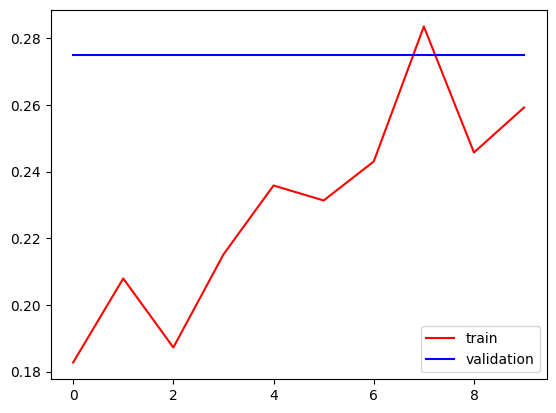

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

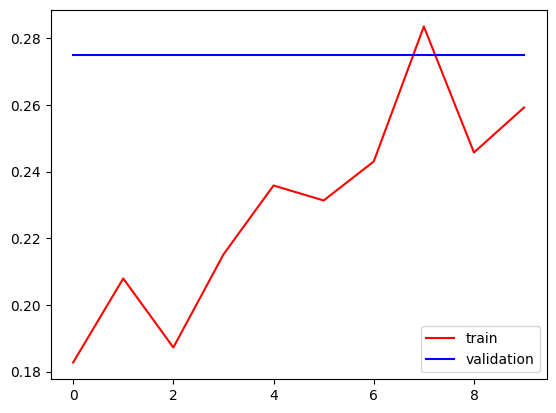

In [ ]:
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

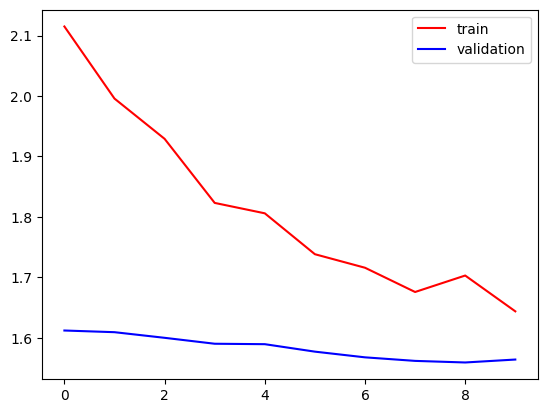

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

Text(0.5, 1.0, 'Loss Curves')

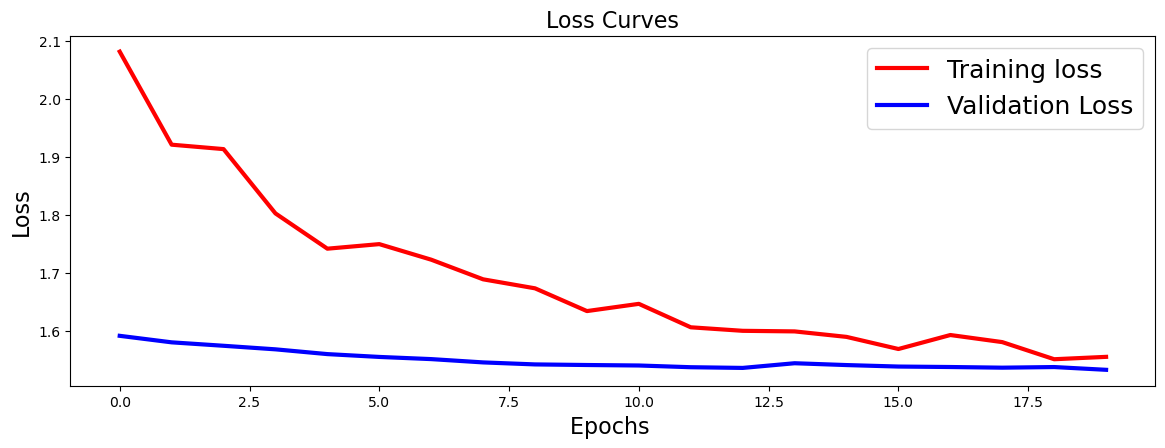

In [ ]:
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

Text(0.5, 1.0, 'Accuracy Curves')

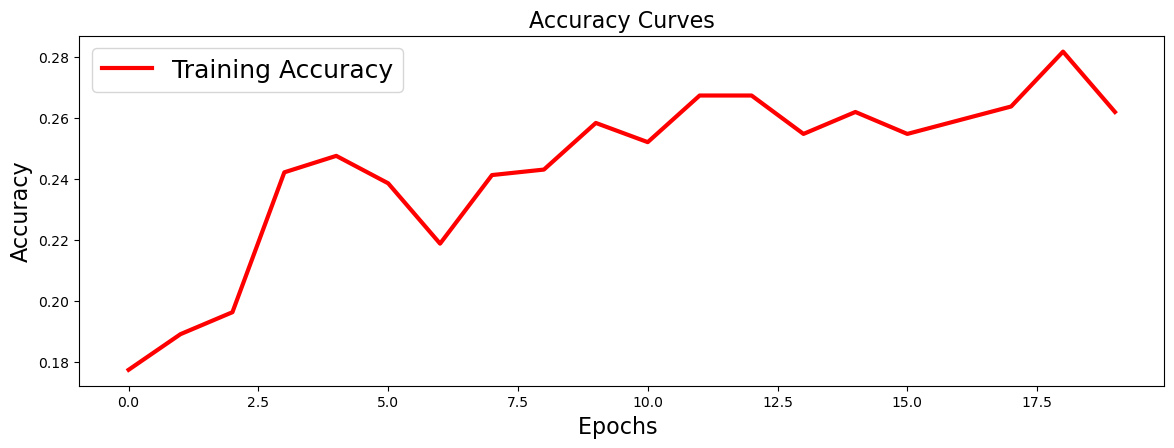

In [ ]:
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
loss,accuracy=model.evaluate(test_ds)
print("accuracy :%f \n loss: %f"%(accuracy,loss))

18/18 [==============================] - 34s 2s/step - loss: 1.5534 - accuracy: 0.2518
accuracy :0.251786 
 loss: 1.553446


In [ ]:
test_img = cv2.imread(r"C:\Users\kanchan bisht\Desktop\DR Dataset\data\test\Moderate\2273_right.jpeg")

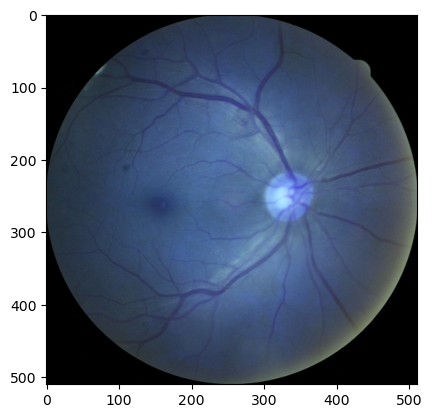

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(510, 512, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)[0]

1/1 [==============================] - 0s 250ms/step


array([[0.23659943, 0.25388217, 0.24433516, 0.11527016, 0.14991303]],
      dtype=float32)

In [ ]:
sum([0.23659943, 0.25388217, 0.24433516, 0.11527016, 0.14991303])

0.99999995

In [ ]:
import numpy as np
np.argmax([0.23659943, 0.25388217, 0.24433516, 0.11527016, 0.14991303])

1

Confusion Matrix

In [ ]:
all_actual_labels = []
for _, labels in test_ds:
    all_actual_labels.extend(labels.numpy())
all_actual_labels = np.array(all_actual_labels)

In [ ]:
all_actual_labels

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0.],
       ...,
       [0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]], dtype=float32)

In [ ]:
actual_labels = test_ds.class_indices
print(actual_labels)

AttributeError: '_PrefetchDataset' object has no attribute 'class_indices'

In [ ]:
predictions = model.predict(test_ds)

18/18 [==============================] - 184s 5s/step


In [ ]:
predicted_labels = predictions.argmax(axis=1)

In [ ]:
cm = confusion_matrix(all_actual_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

ValueError: Classification metrics can't handle a mix of multilabel-indicator and binary targets